In [1]:
import numpy
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import bovy_plot
_R0, _V0= 8., 220.
%pylab inline

/Users/bovy/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters

Populating the interactive namespace from numpy and matplotlib


# Which pattern speeds should affect Pal 5 significantly?

We compute the orbital frequencies $\Omega_r$, $\Omega_\phi$, and $\Omega_z$ and see whether $\Omega_r$ and $\Omega_\phi$ satisfy the Lindblad resonance condition $n\,(\Omega_\phi - \Omega_p) = \pm\Omega_r$ for different $n$ and $\Omega_p$. We check this by plotting $|\Omega_r+n\,(\Omega_\phi-\Omega_p)|^{-1}$, which diverges at a resonance.

We do this for Pal 5 as follows: initialize a ``galpy`` Orbit instance for Pal 5 and a ``actionAngleIsochroneApprox`` instance to compute the frequencies in ``MWPotential2014``:

In [2]:
pal5= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=_R0,vo=_V0,solarmotion=[-11.1,24.,7.25])  
aAIA= actionAngleIsochroneApprox(pot=MWPotential2014,b=0.8)

Then we compute the frequencies as

In [3]:
_,_,_,Or,Op,Oz= aAIA.actionsFreqs(pal5)

and plot!

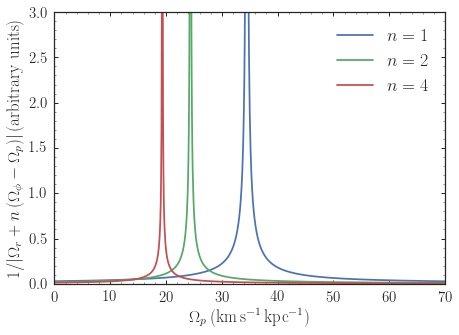

In [4]:
Omegas= numpy.linspace(0.,70.,1001)
overplot= False
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
figsize(7,5)
for n in [1,2,4]:
    bovy_plot.bovy_plot(Omegas,1./numpy.fabs(Or*_V0/_R0+n*(Op*_V0/_R0-Omegas)),
                        xrange=[0.,70.],yrange=[0.,3.],
                       xlabel=r'$\Omega_p\,(\mathrm{km\,s}^{-1}\,\mathrm{kpc}^{-1})$',
                        ylabel=r'$1/|\Omega_r+n\,(\Omega_\phi-\Omega_p)|\,(\mathrm{arbitrary\ units})$',
                       overplot=overplot,label=r'$n = {}$'.format(n))
    overplot=True
legend(fontsize=18);

The only relevant resonance for the bar therefore appears to be the $n=1$ resonance, near $\Omega_p \approx 35\,\mathrm{km\,s}^{-1}\,\mathrm{kpc}^{-1}$. For spiral structure, which would likely have a smaller pattern speed, the relevant resonances are at $\Omega_p \approx 24.5\,\mathrm{km\,s}^{-1}\,\mathrm{kpc}^{-1}$ for a two-armed spiral and $\Omega_p \approx 19.5\,\mathrm{km\,s}^{-1}\,\mathrm{kpc}^{-1}$ for a four-armed spiral.